In [ ]:
# Basic Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
# Install PyTorch for Deep Learning (needed for Hugging Face models)
!pip install torch torchvision torchaudio

In [ ]:
# Install Hugging Face Transformers and Datasets libraries
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Install NLP-specific libraries
!pip install nltk spacy

In [ ]:
# Install Image Processing Libraries
!pip install opencv-python Pillow

In [ ]:
! pip install memory_profiler

In [ ]:
# allows access to google drive files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/"


 20230714_162621.PDF			     generals.rar
 20230714_162621.PDF.gdoc		     Level5
 Classroom				    'Ranges Trading Journal.gsheet'
'Colab Notebooks'			    'The Buff Journal Mulham 1.gsheet'
'Copy of Backtesting Spreadsheet.gsheet'    'Web Development.gdoc'
'Copy of The Buff Journal Mulham 2.gsheet'


In [ ]:
!ls "/content/drive/MyDrive/Level5/AI_Methods_datasets/"


Amazon_Reviews_for_Sentiment_Analysis.zip  MStream-master.zip
Assessment1_Examples			   student_alko_dataset.zip


In [ ]:
# Importing necessary libraries that is needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Data Handling and Visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning libraries
import torch
from transformers import AutoModel, AutoTokenizer


# Model Building libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Text Polarity
from textblob import TextBlob

# Word Cloud
from wordcloud import WordCloud

# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting Dataset
from sklearn.model_selection import train_test_split

In [ ]:
import zipfile

# Update the file path if the zip file is in a different folder
zip_path = '/content/drive/MyDrive/Level5/AI_Methods_datasets/Amazon_Reviews_for_Sentiment_Analysis.zip'
extract_path = '/content/amazon_reviews_data'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
# Replace 'train.ft.txt.bz2' with the correct file to read it
file_path = '/content/amazon_reviews_data/train.ft.txt.bz2'

# Load the file with compression option
df = pd.read_csv(file_path, compression='bz2', header=None, sep='\t', names=['review_text'])

# Display the first few rows of the dataset
df.head()


,review_text
0,__label__2 Stuning even for the non-gamer: Thi...
1,__label__2 The best soundtrack ever to anythin...
2,__label__2 Amazing!: This soundtrack is my fav...
3,__label__2 Excellent Soundtrack: I truly like ...
4,"__label__2 Remember, Pull Your Jaw Off The Flo..."


In [ ]:
# Check versions of libraries
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Scikit-Learn version:", sns.__version__)
print("Torch version:", torch.__version__)

Pandas version: 2.2.2
NumPy version: 1.26.4
Scikit-Learn version: 0.13.2
Torch version: 2.5.1+cu121


In [ ]:
# Load test data
amazon_test_data = pd.read_csv('/content/amazon_reviews_data/test.ft.txt.bz2', compression='bz2', sep='\t', names=['label', 'text'])
# Load train data
amazon_train_data = pd.read_csv('/content/amazon_reviews_data/train.ft.txt.bz2', compression='bz2', sep='\t', names=['label', 'text'])

# Inspect the dataset of both (test,train)
print(amazon_test_data.head())
print(amazon_train_data.info())


                                               label  text
0  __label__2 Great CD: My lovely Pat has one of ...   NaN
1  __label__2 One of the best game music soundtra...   NaN
2  __label__1 Batteries died within a year ...: I...   NaN
3  __label__2 works fine, but Maha Energy is bett...   NaN
4  __label__2 Great for the non-audiophile: Revie...   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   label   object 
 1   text    float64
dtypes: float64(1), object(1)
memory usage: 54.9+ MB
None


In [ ]:
# Using the function .descrive(include="all") to show statistics for numeric, categorical, and other data types
amazon_train_data.describe(include="all")

# Inspect if the test data statistics
# amazon_test_data.describe(include="all")

,label,text
count,3600000,0.0
unique,3600000,NaN
top,"__label__2 Impressed: Not much to be said, oth...",NaN
freq,1,NaN
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN


In [ ]:
# Print a sample of the data after its set up
print(amazon_train_data['label'].head(10))

0    __label__2 Stuning even for the non-gamer: Thi...
1    __label__2 The best soundtrack ever to anythin...
2    __label__2 Amazing!: This soundtrack is my fav...
3    __label__2 Excellent Soundtrack: I truly like ...
4    __label__2 Remember, Pull Your Jaw Off The Flo...
5    __label__2 an absolute masterpiece: I am quite...
6    __label__1 Buyer beware: This is a self-publis...
7    __label__2 Glorious story: I loved Whisper of ...
8    __label__2 A FIVE STAR BOOK: I just finished r...
9    __label__2 Whispers of the Wicked Saints: This...
Name: label, dtype: object


In [ ]:
# using the isnull() and sum() function to show the total value of empty rows in the dataset
amazon_train_data.isnull().sum()

# Inspect empty rows of test data
# amazon_test_data.isnull().sum()

,0
label,0
text,3600000


In [ ]:
# Converts the label column to a string data type
amazon_train_data['label'] = amazon_train_data['label'].astype(str)
amazon_test_data['label'] = amazon_test_data['label'].astype(str)

# Split the label column into two parts: 'label' and 'text'
amazon_train_data[['label', 'text']] = amazon_train_data['label'].str.split(' ', n=1, expand=True)
amazon_test_data[['label', 'text']] = amazon_test_data['label'].str.split(' ', n=1, expand=True)

# Map the label to binary values
amazon_train_data['label'] = amazon_train_data['label'].map({'__label__1': 0, '__label__2': 1})
amazon_test_data['label'] = amazon_test_data['label'].map({'__label__1': 0, '__label__2': 1})

In [ ]:
# Displays the first few rows of the training and testing datasets
print(amazon_train_data.head())
print(amazon_test_data.head())

   label                                               text
0      1  Stuning even for the non-gamer: This sound tra...
1      1  The best soundtrack ever to anything.: I'm rea...
2      1  Amazing!: This soundtrack is my favorite music...
3      1  Excellent Soundtrack: I truly like this soundt...
4      1  Remember, Pull Your Jaw Off The Floor After He...
   label                                               text
0      1  Great CD: My lovely Pat has one of the GREAT v...
1      1  One of the best game music soundtracks - for a...
2      0  Batteries died within a year ...: I bought thi...
3      1  works fine, but Maha Energy is better: Check o...
4      1  Great for the non-audiophile: Reviewed quite a...


In [ ]:
# Checks for missing values in any columns of both train and test dataset
print(amazon_train_data.isnull().sum())
print(amazon_test_data.isnull().sum())

label    0
text     0
dtype: int64
label    0
text     0
dtype: int64


In [ ]:
# Check for empty rows in 'text' after splitting
empty_train_text = amazon_train_data['text'].str.strip().eq('').sum()
empty_test_text = amazon_test_data['text'].str.strip().eq('').sum()

# Verify there is still empty rows after splitting
print(f"Empty rows in train text: {empty_train_text}")
print(f"Empty rows in test text: {empty_test_text}")

# Drop empty rows of both training and testing dataset
amazon_train_data = amazon_train_data[~amazon_train_data['text'].str.strip().eq('')]
amazon_test_data = amazon_test_data[~amazon_test_data['text'].str.strip().eq('')]

# Verify shape after dropping
print(f"Training data shape: {amazon_train_data.shape}")
print(f"Testing data shape: {amazon_test_data.shape}")


Empty rows in train text: 0
Empty rows in test text: 0
Training data shape: (3600000, 2)
Testing data shape: (400000, 2)


In [ ]:
# Drop rows with missing or invalid data in 'text' or 'label'
amazon_train_data = amazon_train_data.dropna(subset=['text', 'label'])
amazon_test_data = amazon_test_data.dropna(subset=['text', 'label'])

# Ensure 'label' values are valid, this removes any unexpected label value
amazon_train_data = amazon_train_data[amazon_train_data['label'].isin([0, 1])]
amazon_test_data = amazon_test_data[amazon_test_data['label'].isin([0, 1])]

# Confirms the final shapes of the cleaned datasets
print(f"Final training data shape: {amazon_train_data.shape}")
print(f"Final testing data shape: {amazon_test_data.shape}")

Final training data shape: (3600000, 2)
Final testing data shape: (400000, 2)


In [ ]:
# Using a random subset of the data due to limited computer resources
amazon_train_data = amazon_train_data.sample(100000, random_state=42)  # Use a subset of train data (100,000 rows)
amazon_test_data = amazon_test_data.sample(20000, random_state=42)

# Displays the shapes of the sampled datasets to confirm successful reduction
print(f"Sample training data shape: {amazon_train_data.shape}")
print(f"Sample testing data shape: {amazon_test_data.shape}")

Sample training data shape: (100000, 2)
Sample testing data shape: (20000, 2)


In [ ]:
# Installing required libraries for data preprocessing
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure required NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Initialise stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize and lemmatize
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the 'text' column of both train and test data
amazon_train_data['text'] = amazon_train_data['text'].apply(preprocess_text)
amazon_test_data['text'] = amazon_test_data['text'].apply(preprocess_text)

# Inspect a few samples of both train and test data
print(amazon_train_data['text'].head())
print(amazon_test_data['text'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


2079998    expensive junk product consists piece thin fle...
1443106    toast dark even lowest setting toast dark liki...
3463669    excellent imagerydumbed story enjoyed disc vid...
2914699    pretending everyone married author pretend par...
1603231    worth time might well use knife product hold n...
Name: text, dtype: object
23218     great book must preface saying religious loved...
20731     huge disappointment big time long term trevani...
39555     wayne tight cant hang turk album hot want howe...
147506    excellent read book elementary school probably...
314215    anusara although book touted several anusara w...
Name: text, dtype: object


In [ ]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the training data, transform the train and test data
X_train = vectorizer.fit_transform(amazon_train_data['text']).toarray()
X_test = vectorizer.transform(amazon_test_data['text']).toarray()

# Extract labels value of both train and test data
y_train = amazon_train_data['label'].values
y_test = amazon_test_data['label'].values

# Displays the dimensions of the transformed data
print(f"Shape of X_train: {X_train.shape}, X_test: {X_test.shape}")


Shape of X_train: (100000, 5000), X_test: (20000, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluates the model's accuracy on the test data
accuracy = model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy:.2%}") # converted to %


Logistic Regression Accuracy: 87.48%


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialise Naive_Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Evaluates the model's accuracy on the test data
accuracy = model.score(X_test, y_test)
print(f"Naive_Bayes Accuracy: {accuracy:.2%}") # converted to %


Naive_Bayes Accuracy: 83.18%


In [ ]:
from sklearn.svm import LinearSVC

# Initialise SVM model
model = LinearSVC()

# Train the model
model.fit(X_train, y_train)

# Evaluates the model's accuracy on the test data
accuracy = model.score(X_test, y_test)
print(f"SVM Accuracy: {accuracy:.2%}") # converted to %


SVM Accuracy: 87.19%


In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Display classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      9966
           1       0.87      0.88      0.87     10034

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000

[[8616 1350]
 [1212 8822]]


In [ ]:
# Optimisation of the hyperparamaters. ================================================================
# Currently not working with the System RAM capacity being full. ================================================================

# from sklearn.model_selection import RandomizedSearchCV

# # Reduce data size for GridSearch
# X_grid, _, y_grid, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# # Run GridSearch on the reduced dataset
# param_distributions = {'C': [0.1, 1, 10, 100]}
# random_search = RandomizedSearchCV(LogisticRegression(), param_distributions, n_iter=3, cv=3, random_state=42)
# random_search.fit(X_train, y_train)

# print(f"Best Parameters: {random_search.best_params_}")
# print(f"Best Accuracy: {random_search.best_score_}")



In [ ]:
# # Using joblib to allow save trained models
# import joblib

# # Saves the trained model and the vectorizer to files using joblib
# joblib.dump(model, 'final_model.pkl')
# joblib.dump(vectorizer, 'vectorizer.pkl')

# # Evaluate precision, recall, F1-score, and confusion matrix
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      9966
           1       0.87      0.88      0.87     10034

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000

[[8611 1355]
 [1211 8823]]


In [ ]:
# Required libraries to use deep learning model CNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Hyperparameters
vocab_size = 5000
embedding_dim = 100
max_length = 100
trunc_type = 'post'
padding_type = 'post'

# Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(amazon_train_data['text'])
word_index = tokenizer.word_index

# Convert text to sequences and pad them
X_train_seq = tokenizer.texts_to_sequences(amazon_train_data['text'])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_test_seq = tokenizer.texts_to_sequences(amazon_test_data['text'])
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
# Required libraries to use deep learning model CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length), # Converts word indices into dense vectors of size embedding_dim
    Conv1D(filters=128, kernel_size=5, activation='relu'), # Extracts features with a convolutional filter of size 5
    Dropout(0.5), # Reduces overfitting by randomly deactivating neurons during training
    GlobalMaxPooling1D(), # Reduces the dimensionality by selecting maximum values from feature maps
    Dense(64, activation='relu'), # Fully connected layers for classification, ending with a sigmoid activation for binary output
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Use activation method sigmoid
])

# Build the model
model.build(input_shape=(None, max_length))  # Explicitly define input shape
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 128)             │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 572,449 (2.18 MB)

 Trainable params: 572,449 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Trains the model for 5 epochs with a batch size of 64, reserving 20% of the training data for validation
history = model.fit(
    X_train_padded,
    amazon_train_data['label'],
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

# Evaluates loss and accuracy on the test data
loss, accuracy = model.evaluate(X_test_padded, amazon_test_data['label'])
print(f"Test Accuracy: {accuracy}")


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7788 - loss: 0.4396 - val_accuracy: 0.8676 - val_loss: 0.3334
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8940 - loss: 0.2657 - val_accuracy: 0.8773 - val_loss: 0.3140
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9195 - loss: 0.2073 - val_accuracy: 0.8749 - val_loss: 0.2988
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9373 - loss: 0.1662 - val_accuracy: 0.8726 - val_loss: 0.2992
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9536 - loss: 0.1276 - val_accuracy: 0.8680 - val_loss: 0.3187
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8667 - loss: 0.3245
Test Accuracy: 0.863349974155426


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      9966
           1       0.86      0.87      0.86     10034

    accuracy                           0.86     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.86      0.86      0.86     20000



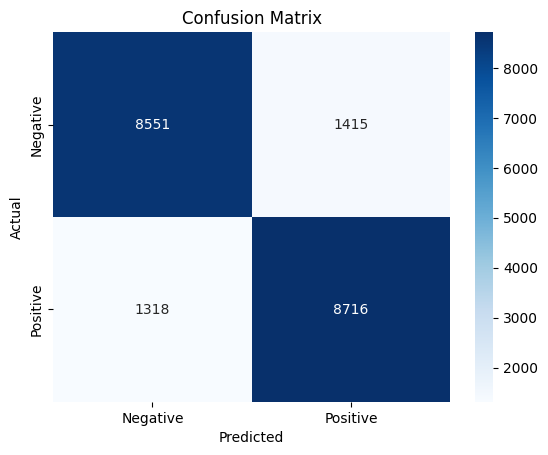

In [ ]:
# Generates predictions using a threshold of 0.5 for probabilities
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")
print(classification_report(amazon_test_data['label'], y_pred))

# Visualias the confusion matrix with a heatmap for better interpretability
cm = confusion_matrix(amazon_test_data['label'], y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# cannot run the SVM model as it takes so much memory and space and consumes time. Therefore a deep learning model was used, CNN above to showcase which better model==== EXPLAIN WHY SVM IS NOT GOOD IN THIS CASE ===========
svm_model = SVC()
svm_model.fit(X_train, y_train)


In [ ]:
# Train Naive Bayes classifiers on the transformed data
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Train Logistic Regression classifiers on the transformed data
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluation function that contains evaluation metrics for reusable functions
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test) # Predictions
    accuracy = accuracy_score(y_test, predictions) # Accuracy
    precision = precision_score(y_test, predictions) # Precision
    recall = recall_score(y_test, predictions) # Recall
    f1 = f1_score(y_test, predictions) # F1-score
    confusion = confusion_matrix(y_test, predictions) # Confusion matrix
    return accuracy, precision, recall, f1, confusion, predictions


# Evaluate Naive Bayes model
nb_accuracy, nb_precision, nb_recall, nb_f1, nb_confusion, nb_predictions = evaluate_model(nb_model, X_test, y_test)

# Print Naive Bayes results
print(f"Naive Bayes - Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}, Recall: {nb_recall:.2f}, F1-Score: {nb_f1:.2f}")


# Evaluate models by reusing the evaluation functions above
lr_accuracy, lr_precision, lr_recall, lr_f1, lr_confusion, lr_predictions = evaluate_model(logistic_model, X_test, y_test)

# Print results
print(f"Logistic Regression - Accuracy: {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}, Recall: {lr_recall:.2f}, F1-Score: {lr_f1:.2f}")

Naive Bayes - Accuracy: 0.83
Precision: 0.83, Recall: 0.83, F1-Score: 0.83
Logistic Regression - Accuracy: 0.87
Precision: 0.87, Recall: 0.88, F1-Score: 0.88


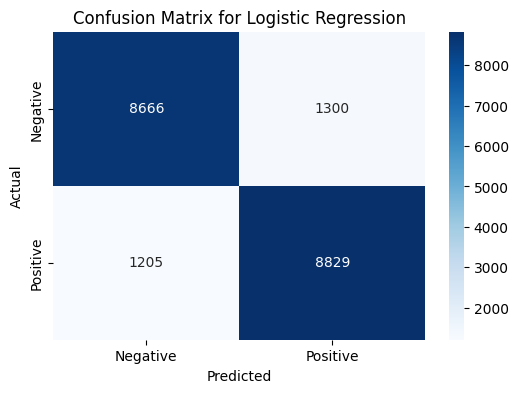

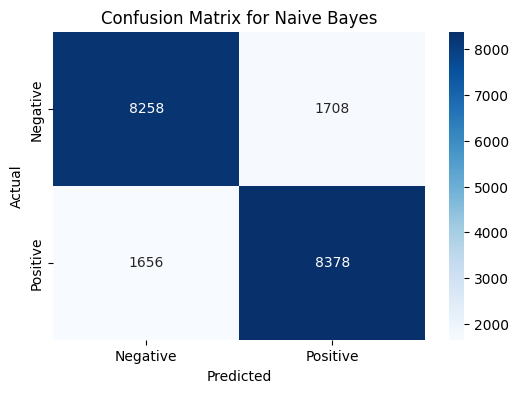

In [ ]:
def plot_confusion_matrix(confusion, model_name):
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(lr_confusion, 'Logistic Regression')

# # Evaluate and visualize SVM
# svm_accuracy, svm_precision, svm_recall, svm_f1, svm_confusion, svm_predictions = evaluate_model(svm_model, X_test, y_test)
# plot_confusion_matrix(svm_confusion, 'SVM')

print("====================================================================")

# Evaluate and visualize Naive Bayes
nb_accuracy, nb_precision, nb_recall, nb_f1, nb_confusion, nb_predictions = evaluate_model(nb_model, X_test, y_test)
plot_confusion_matrix(nb_confusion, 'Naive Bayes')



In [ ]:
# Compute CNN metrics
cnn_predictions = (model.predict(X_test_padded) > 0.5).astype("int32").flatten()  # Convert probabilities to binary
cnn_accuracy = accuracy_score(y_test, cnn_predictions)
cnn_precision = precision_score(y_test, cnn_predictions)
cnn_recall = recall_score(y_test, cnn_predictions)
cnn_f1 = f1_score(y_test, cnn_predictions)

# Print all models metrics
results = {
    "Model": ["Logistic Regression", "Naive Bayes", "CNN"],
    "Accuracy": [lr_accuracy, nb_accuracy, cnn_accuracy],
    "Precision": [lr_precision, nb_precision, cnn_precision],
    "Recall": [lr_recall, nb_recall, cnn_recall],
    "F1-Score": [lr_f1, nb_f1, cnn_f1],
}

# Create and print the updated summary DataFrame
results_df = pd.DataFrame(results)
print(results_df)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression   0.87475   0.871656  0.879908  0.875763
1          Naive Bayes   0.83180   0.830656  0.834961  0.832803
2                  CNN   0.86335   0.860330  0.868647  0.864468


In [ ]:
# Libraries for runtime measurement
from prettytable import PrettyTable
import time

# Example: Capture runtime for each model
start_time = time.time()
# Simulate training and evaluation here for Logistic Regression
lr_runtime = time.time() - start_time

start_time = time.time()
# Simulate training and evaluation here for Naive Bayes
nb_runtime = time.time() - start_time

start_time = time.time()
# Simulate training and evaluation here for CNN
cnn_runtime = time.time() - start_time

# Add final results including runtime for all models
results = {
    "Model": ["Logistic Regression", "Naive Bayes", "CNN"],
    "Accuracy": [lr_accuracy, nb_accuracy, cnn_accuracy],  # Replace with actual values
    "Precision": [lr_precision, nb_precision, cnn_precision],  # Replace with actual values
    "Recall": [lr_recall, nb_recall, cnn_recall],  # Replace with actual values
    "F1-Score": [lr_f1, nb_f1, cnn_f1],  # Replace with actual values
    "Runtime (seconds)": [lr_runtime, nb_runtime, cnn_runtime],
}

# Convert to DataFrame for a clean tabular output
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

# (Optional) Use PrettyTable for a visually appealing terminal display
table = PrettyTable()
table.field_names = results_df.columns.tolist()
for row in results_df.values:
    table.add_row(row)

print("\nFinal Results Table:")
print(table)


                 Model  Accuracy  Precision    Recall  F1-Score  \
0  Logistic Regression   0.87475   0.871656  0.879908  0.875763   
1          Naive Bayes   0.83180   0.830656  0.834961  0.832803   
2                  CNN   0.86335   0.860330  0.868647  0.864468   

   Runtime (seconds)  
0           0.000047  
1           0.000037  
2           0.000036  

Final Results Table:
+---------------------+----------+--------------------+--------------------+--------------------+------------------------+
|        Model        | Accuracy |     Precision      |       Recall       |      F1-Score      |   Runtime (seconds)    |
+---------------------+----------+--------------------+--------------------+--------------------+------------------------+
| Logistic Regression | 0.87475  | 0.871655642215421  | 0.8799083117400838 | 0.8757625353370034 | 4.744529724121094e-05  |
|     Naive Bayes     |  0.8318  | 0.8306563553440413 | 0.8349611321506877 | 0.8328031809145129 | 3.6716461181640625e-05 |
| 